In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend 
from matplotlib import font_manager
from matplotlib import gridspec
import seaborn as sns
import scanpy as sc
import yaml
from pathlib import Path
import warnings
from collections import Counter
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list

warnings.filterwarnings('ignore')

from scripts.atlas_plots import AtlasPlotting


In [2]:
adata = sc.read_h5ad("/mnt/storage/Daniele/atlases/human/Human_Atlas_Harmonised_Core.h5ad")


In [3]:
adata

AnnData object with n_obs × n_vars = 804862 × 44292
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Age', 'Diabetes', 'Is_Core', 'EMT category'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersection_adata_sc', 'n_cells_by_counts_adata_sc', 'mean_counts_adata_sc', 'log1p_mean_counts_adata_sc', 'pct_dropout_by_counts_adata_sc', 'total_counts_adata_sc', 'log1p_total_counts_adata_sc', 'mito_adata_sc', 'n_cells_by_counts_adata_sn', 'mean_counts_adata_sn', 'log1p_mean_counts_adata_sn', 'pct_dropout_by_counts_adata_sn', 'total_counts_adata_sn', 'log1p_total_counts_adata_sn', 'Manual_Genes'
    uns: 'Condition_colors', 'Is_Core_colors', 'Level_1_colors', 'Level_2_colors', 'Level_

In [4]:
for i in adata.obs["TreatmentType"].unique():
    print(i)

Chemotherapy
Untreated
Chemotherapy + Radiotherapy
Other
Chemotherapy + Radiotherapy + Immunotherapy


In [5]:
print(adata.obs["Dataset"].unique())

['Ding_2022', 'Lee_2021', 'Simeone_2023', 'Steele_2020', 'Peng_2019', ..., 'Lin_2020', 'Schlesinger_2020', 'Hwang_2022', 'Kemp_2020', 'Yue_2020']
Length: 11
Categories (11, object): ['Caronni_2023', 'Ding_2022', 'Hwang_2022', 'Kemp_2020', ..., 'Schlesinger_2020', 'Simeone_2023', 'Steele_2020', 'Yue_2020']


In [6]:
adata.obs["Data_Source"] = np.where(adata.obs["Dataset"] == "in_house", "in house", "public data")

In [7]:

figgen = AtlasPlotting("config/config.yml",output_dir="/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2")



In [8]:
masked_plot = {
    "CD4+ T Cells": ["CD4+ Naive T Cell", "CD4+ Th1 Cell", "CD4+ Th2 Cell", "CD4+ Th17 Cell",
            "CD4+ Th22 Cell", "T-reg", "CD4+ Memory T Cell"],
    "CD8+ T Cells": ["CD8+ Naive T Cell", "CD8+ Effector T Cell", "CD8+ Terminal Effector T Cell",
            "CD8+ Exhausted T Cell", "CD8+ Tissue-Resident Memory T Cell", "CD8+ Memory T Cell"],
    "Mixed T Cells": ["Double Positive CD4+CD8+ T Cell", "γδ T Cell (Vδ1)"],
    "Malignant Cells": ["Malignant Cell - Pit Like", "Malignant Cell - Acinar-like", "Malignant Cell - Epithelial",
            "Malignant Cell - Hypoxia", "Malignant Cell - EMT", "Malignant Cell - Highly Proliferative",
            "Malignant Cell - Mesenchymal", "Malignant Cell - Highly Invasive", "Malignant Cell - Senescence",
            "Malignant Cell - Apoptotic"],
    "Macrophages": ["Macrophage - lipid processing TAM", "Macrophage - antigen processing TAM",
            "Macrophage - C1Q+ TAM", "Macrophage - angiogenic TAM", "Macrophage - CD3+ TAM"],
    "Neutrophils": ["Neutrophil - N0", "Neutrophil - N1", "Neutrophil - N2"],
            "Dendritic cells": ["Dendritic Cell - pDC", "Dendritic Cell - cDC1", "Dendritic Cell - cDC2"],

    "Malignant cells": ["Malignant Cell - Pit Like",
                        "Malignant Cell - Acinar-like",
                        "Malignant Cell - Epithelial",
                        "Malignant Cell - Hypoxia",
                        "Malignant Cell - EMT",
                        "Malignant Cell - Highly Proliferative",
                        "Malignant Cell - Mesenchymal",
                        "Malignant Cell - Highly Invasive",
                        "Malignant Cell - Senescence",
                        "Malignant Cell - Apoptotic"]
}

for figure_name, mask_values in masked_plot.items():
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=f"{figure_name}_ordered", mask_values=mask_values)
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=f"{figure_name}_ordered", mask_values=mask_values,highlight_size=1)
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=f"{figure_name}_ordered", mask_values=mask_values,highlight_size=0.75)
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=f"{figure_name}_ordered", mask_values=mask_values,highlight_size=0.5)
    figgen.create_masked_umap_highlight(adata, mask_column="Level_4", figure_name=figure_name, mask_values=mask_values,ordered=False)
    figgen.create_masked_umap(adata, mask_column="Level_4", figure_name=figure_name, mask_values=mask_values)


Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plots for Level_4
Creating masked UMAP plot

In [9]:

figgen.create_masked_umap_highlight(adata, mask_column="TreatmentStatus", figure_name="Treatment Status", mask_values=["Treated"],color_by="TreatmentStatus")



Creating masked UMAP plots for TreatmentStatus


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment_all_grey.png


(<Figure size 800x800 with 2 Axes>, <Figure size 800x800 with 2 Axes>)

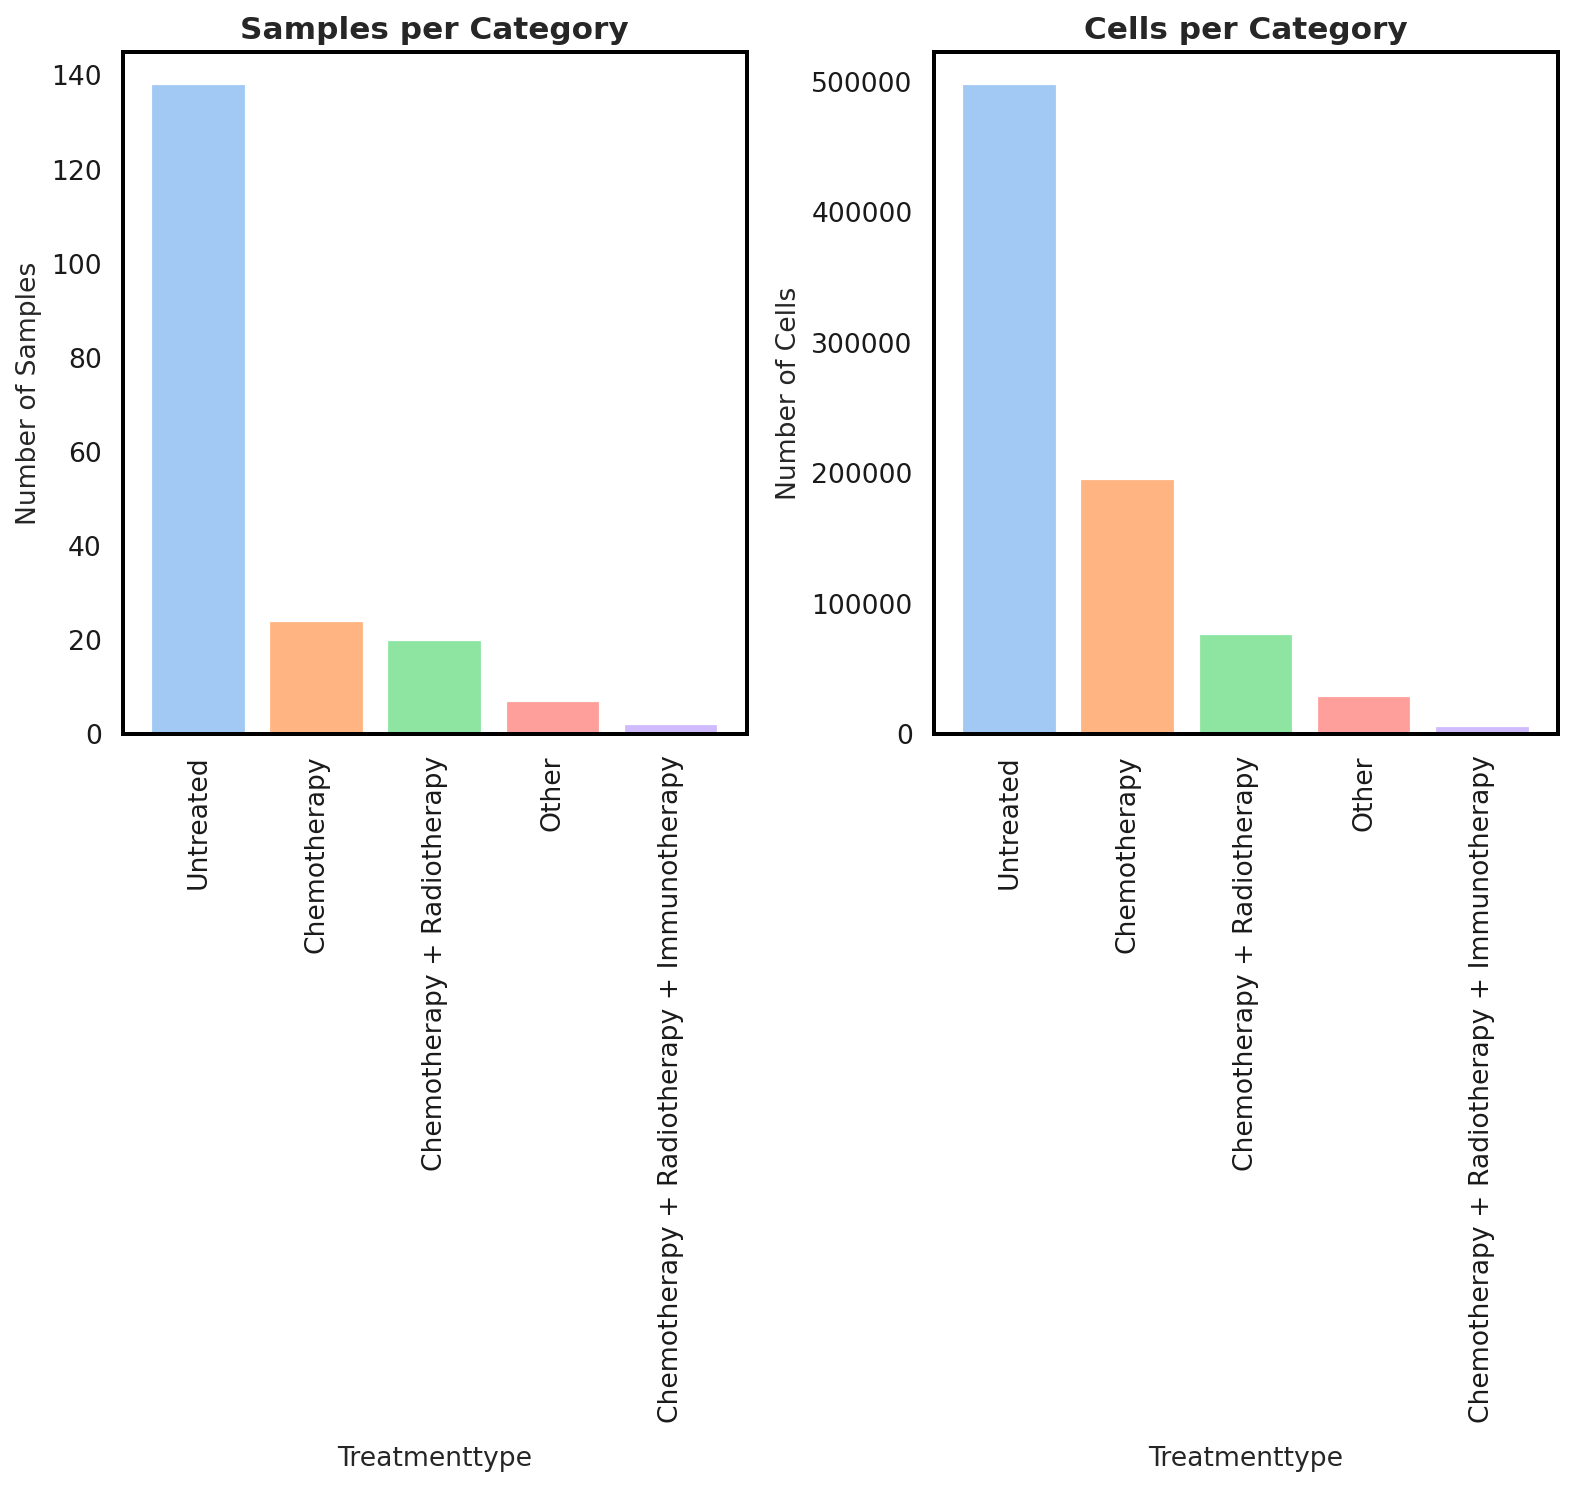

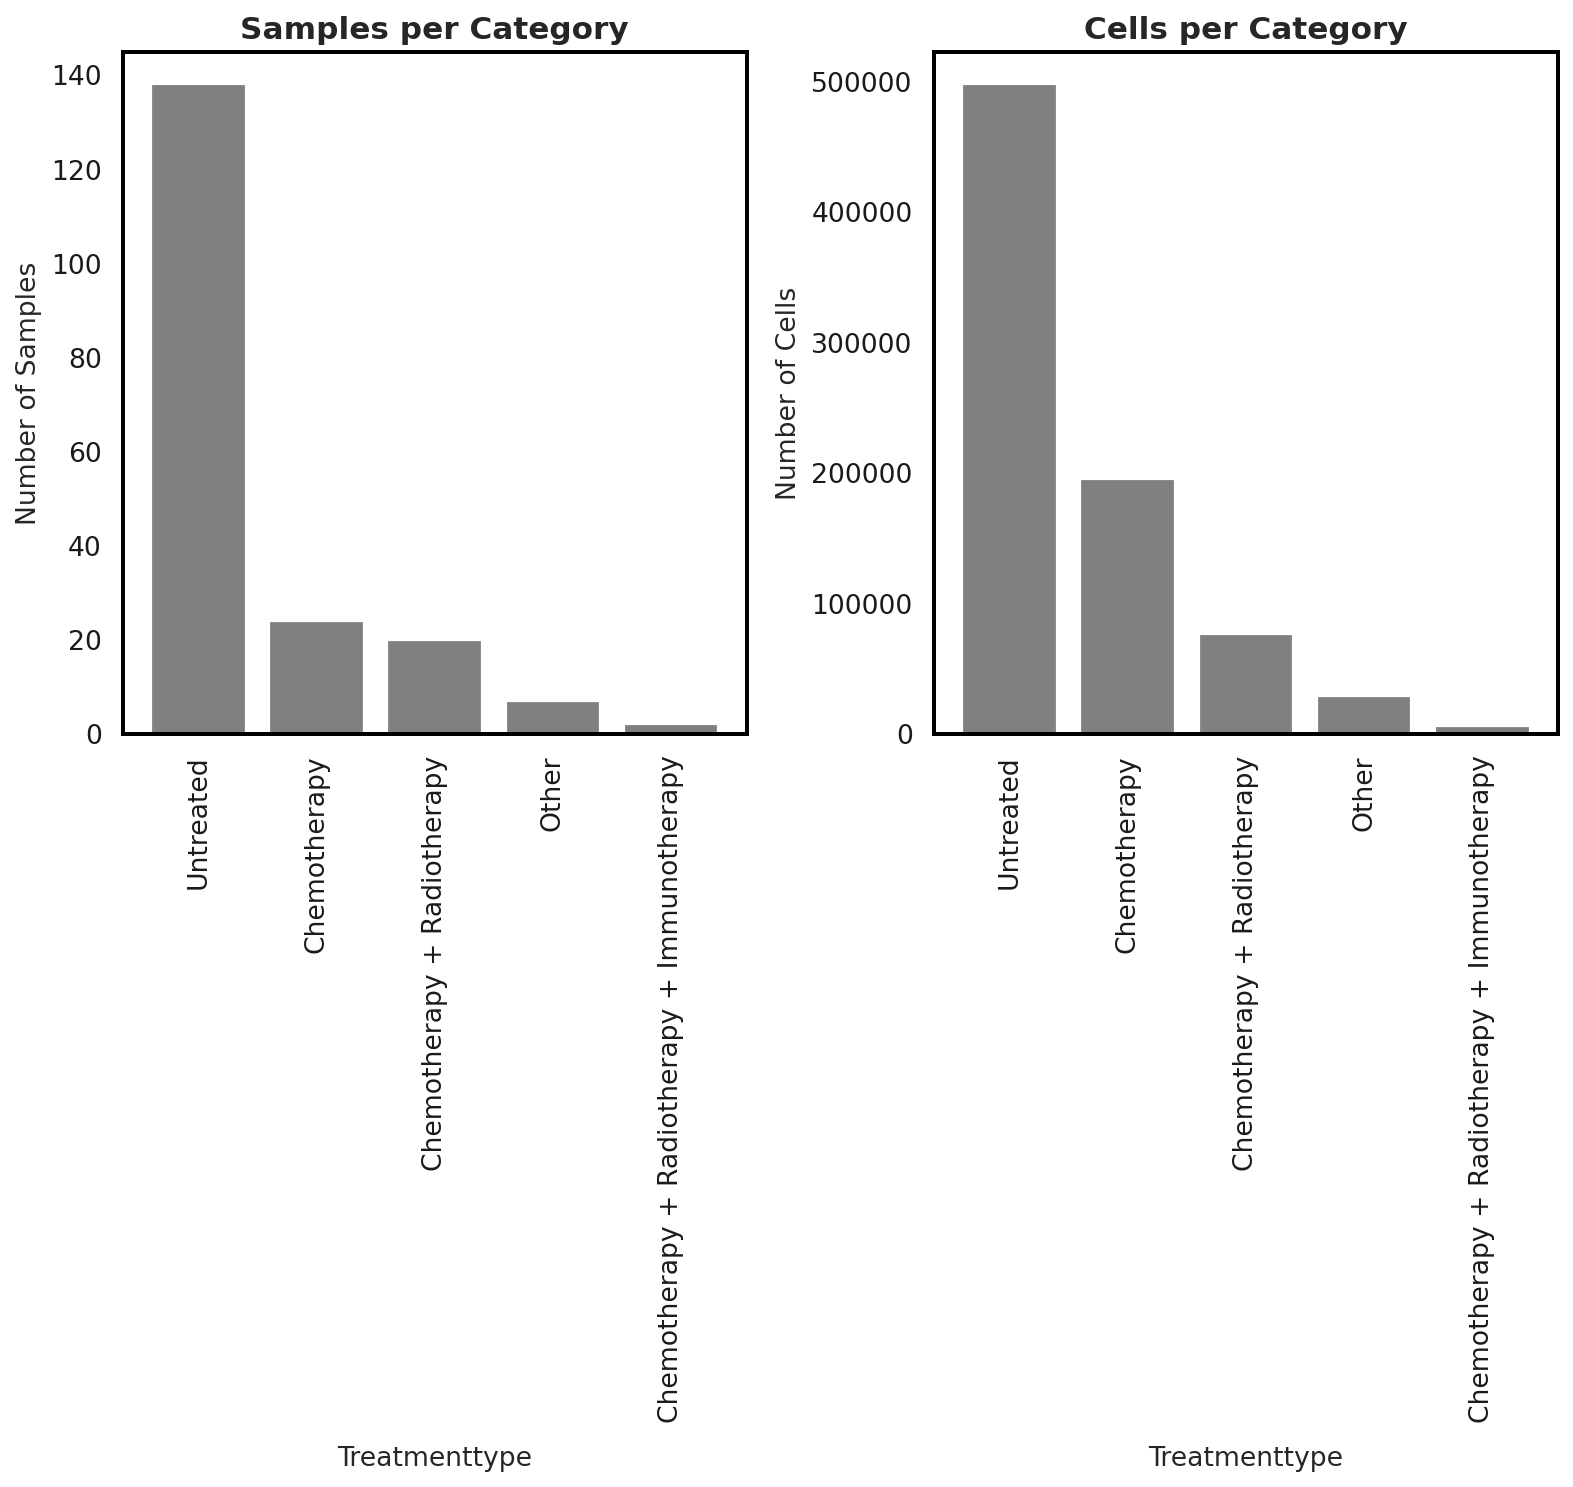

In [10]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="TreatmentType",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment",
    figsize=(10,10)
)


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment_all_grey.png


(<Figure size 800x800 with 2 Axes>, <Figure size 800x800 with 2 Axes>)

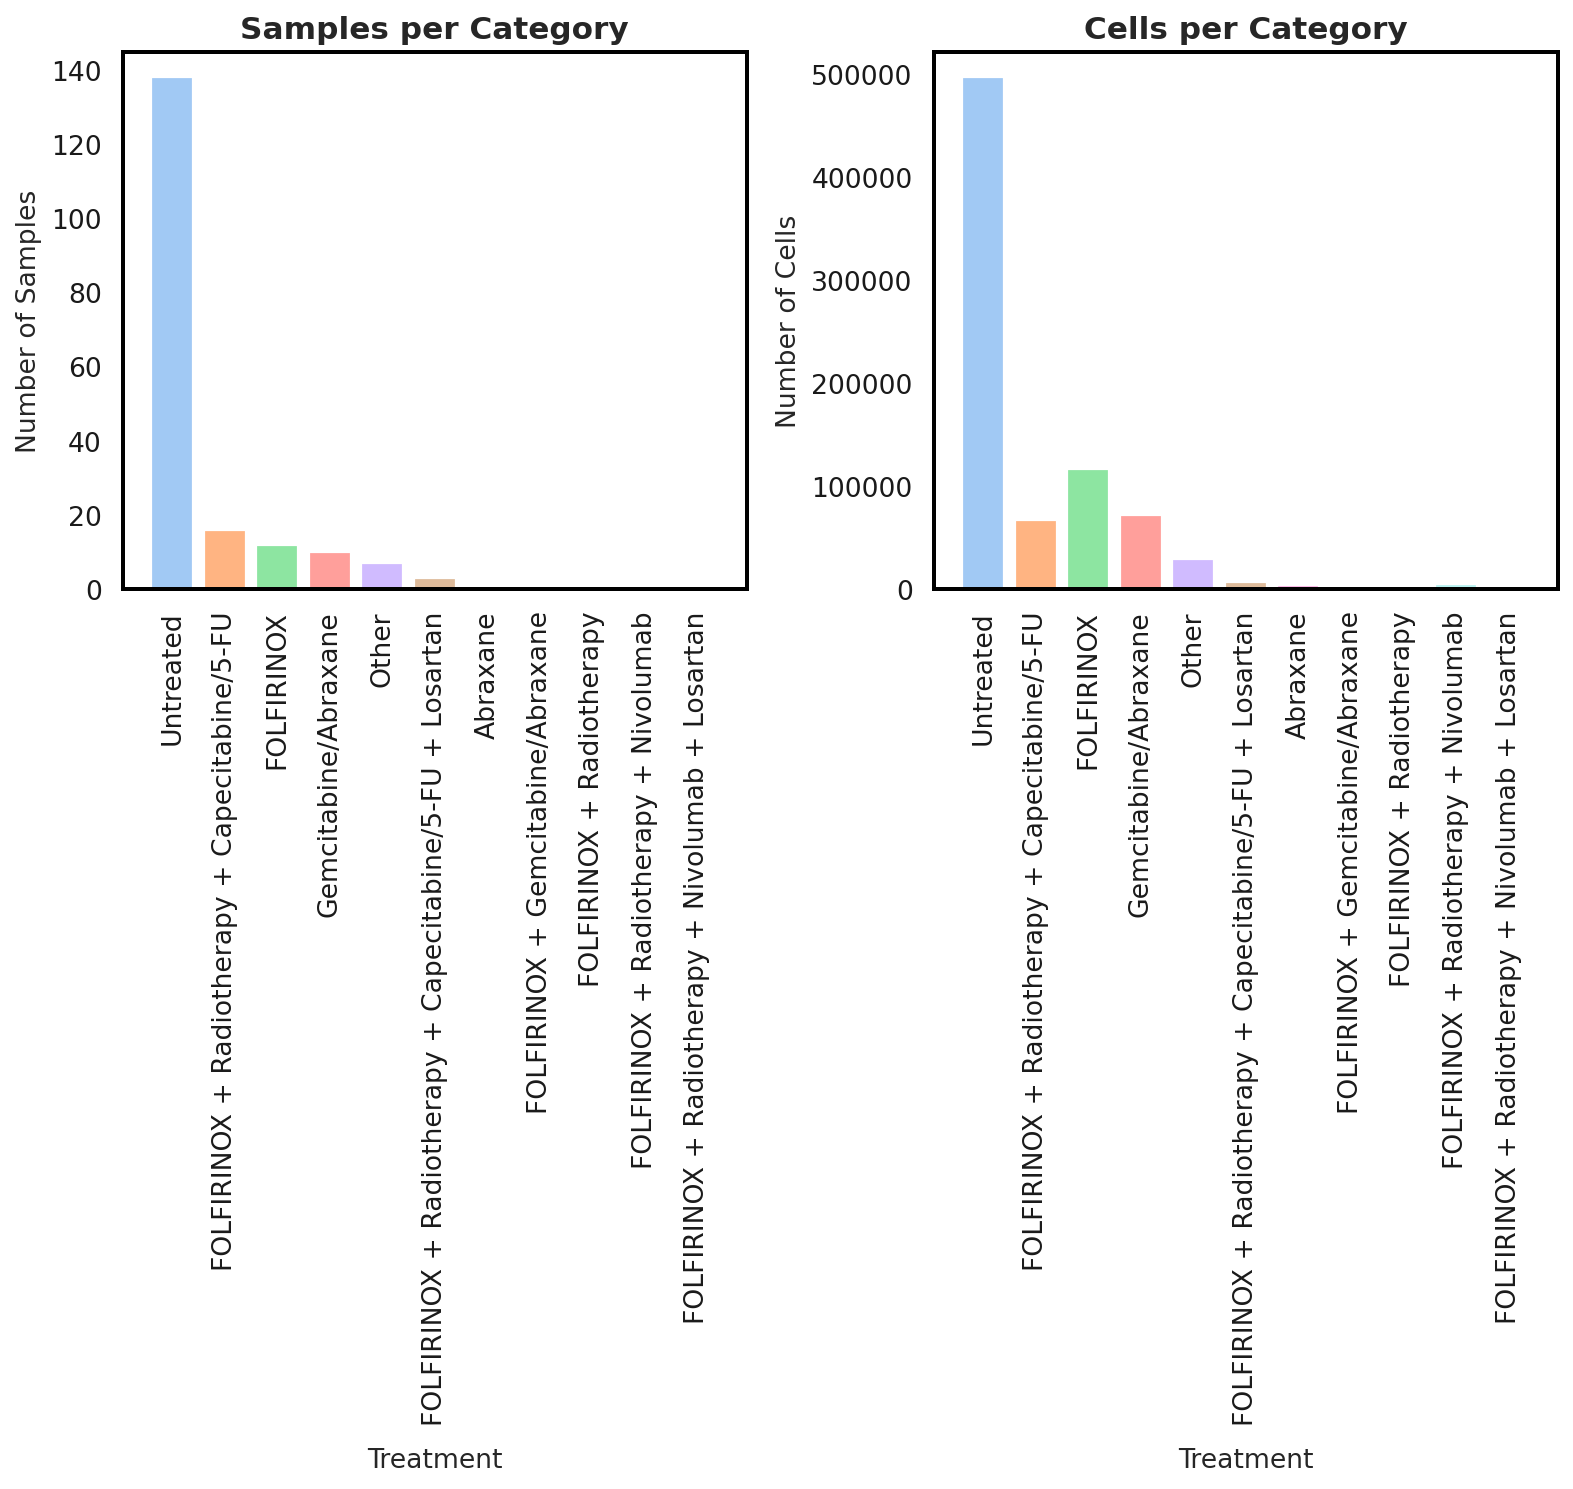

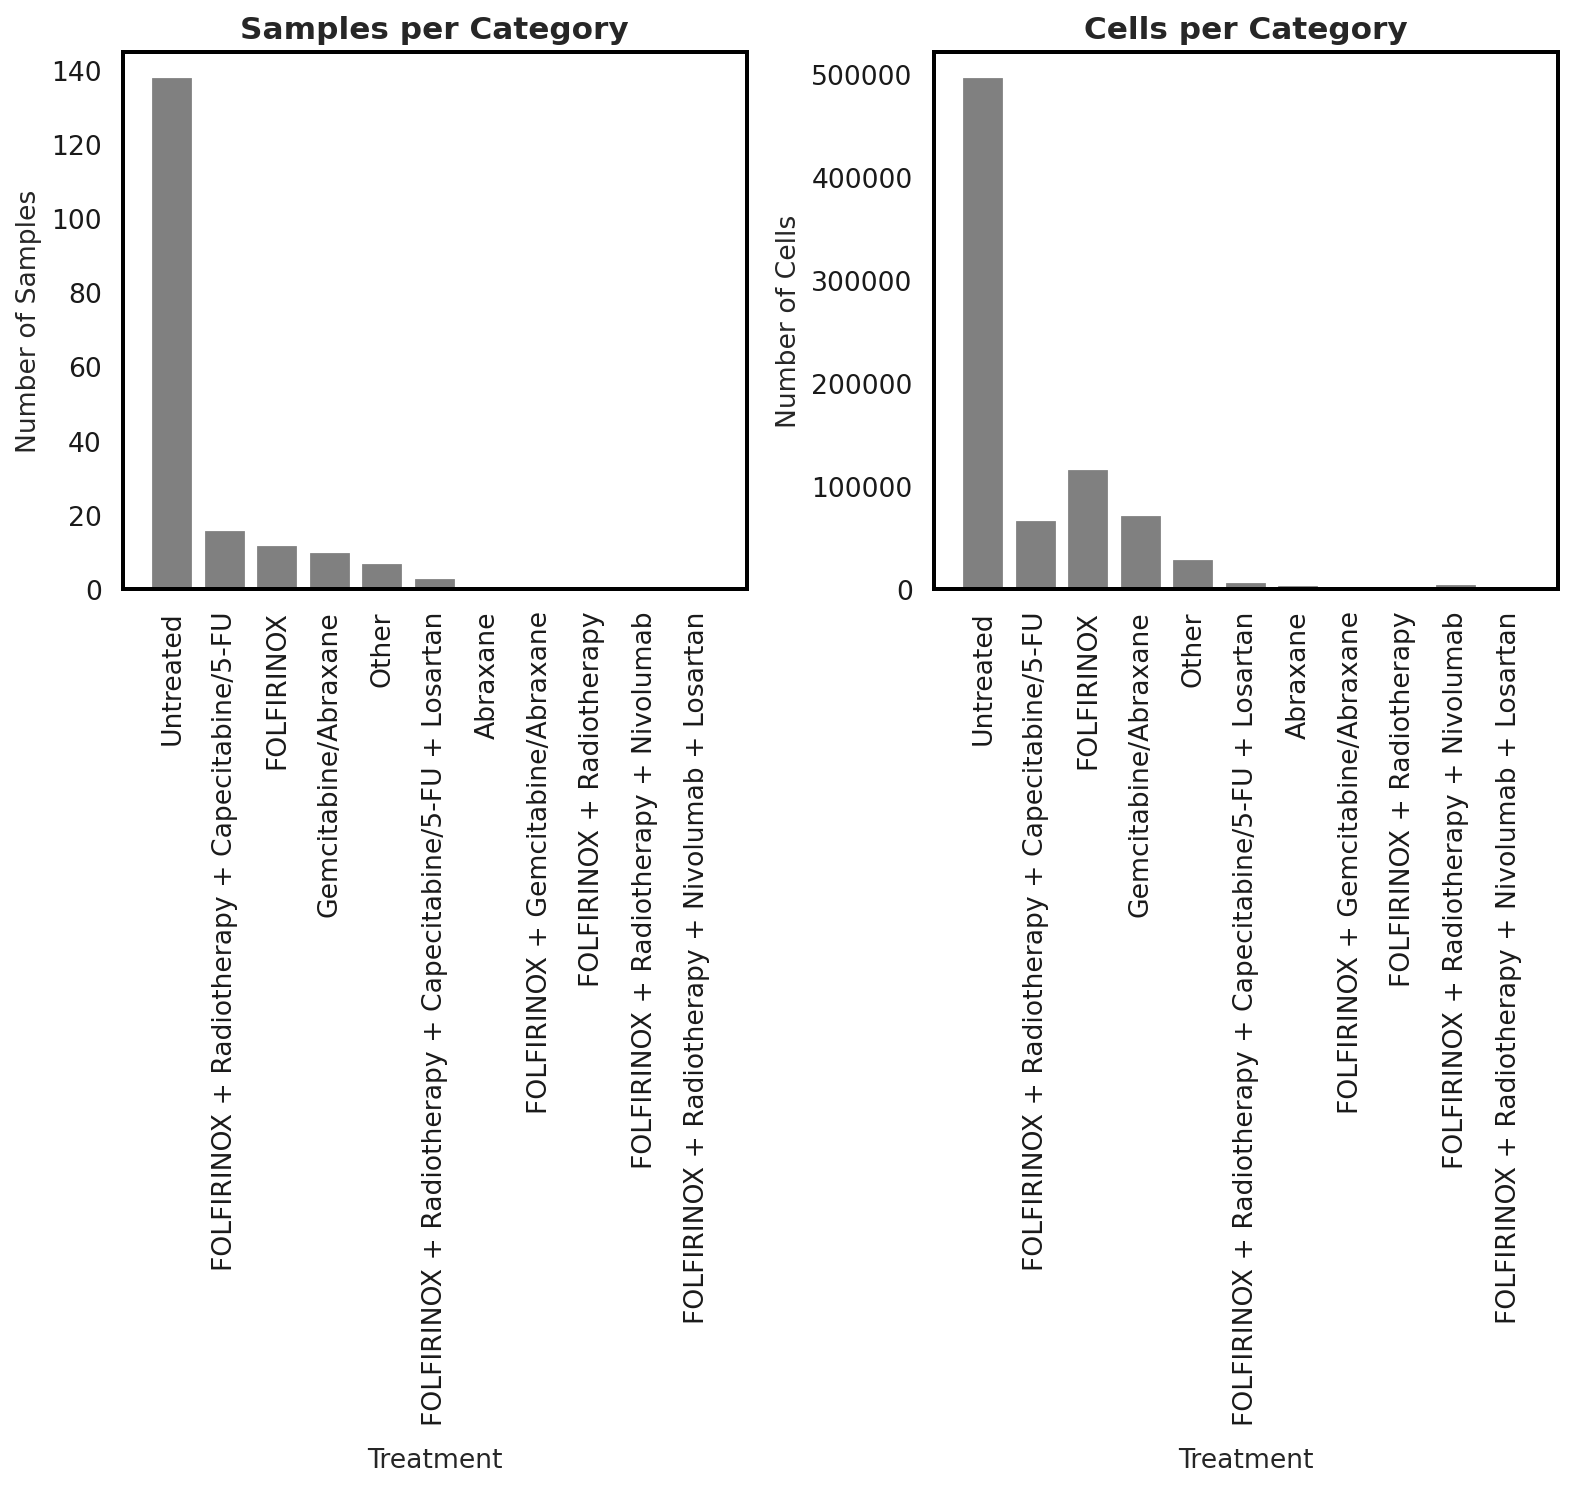

In [11]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="Treatment",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment",
    figsize=(10,10)
)


Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment_status.png
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/sample_cell_counts/sample_cell_counts_treatment_status_all_grey.png


(<Figure size 560x400 with 2 Axes>, <Figure size 560x400 with 2 Axes>)

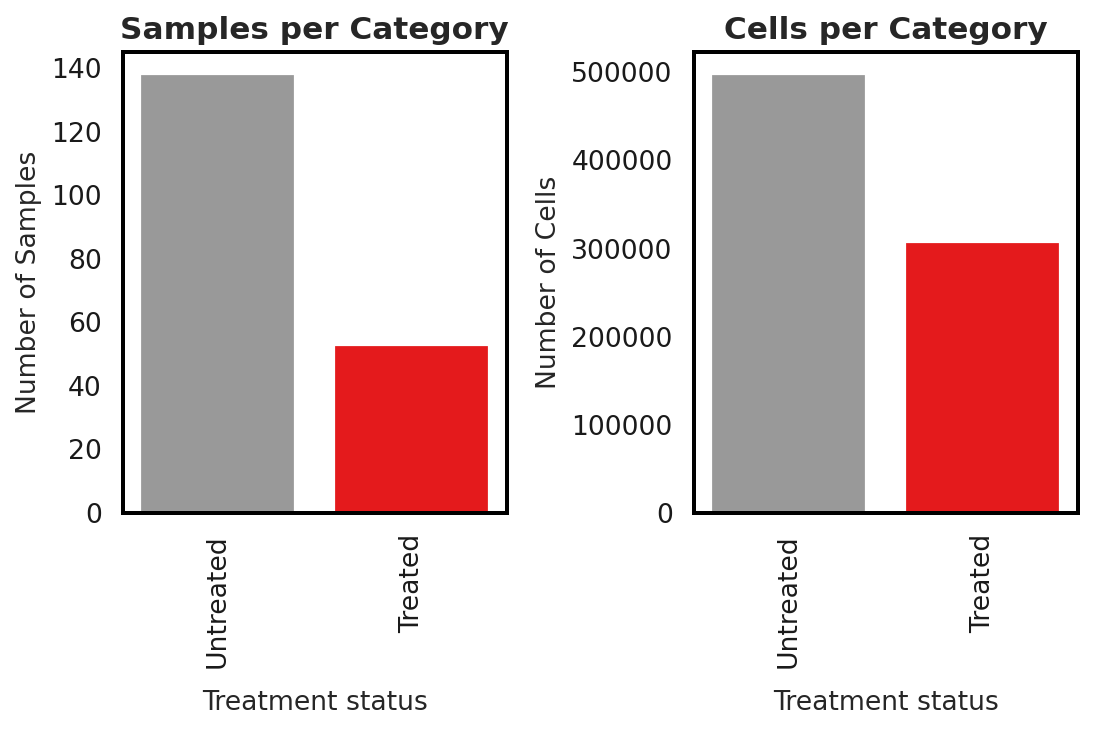

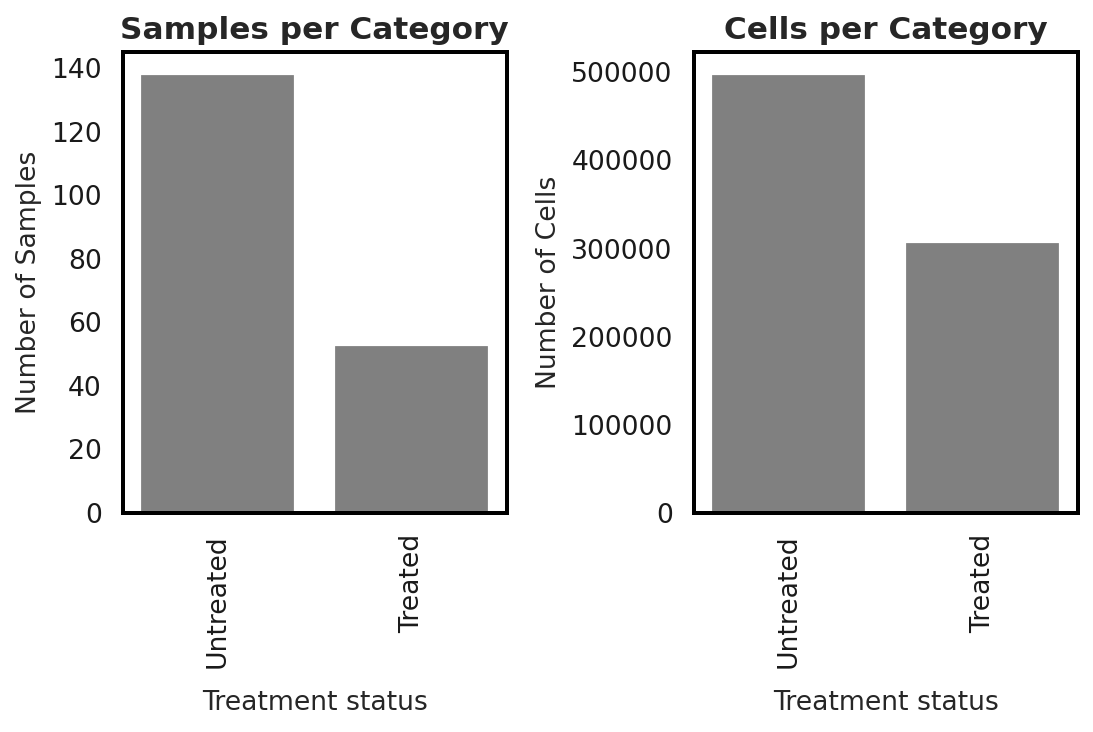

In [12]:
figgen.sample_and_cell_counts_barplot(
    adata,
    level_column="TreatmentStatus",
    sample_column="Sample_ID",
    save_name="sample_cell_counts_treatment_status",
    figsize=(7,5),
    custom_palette=True,
    xlabel="Treatment status"
)

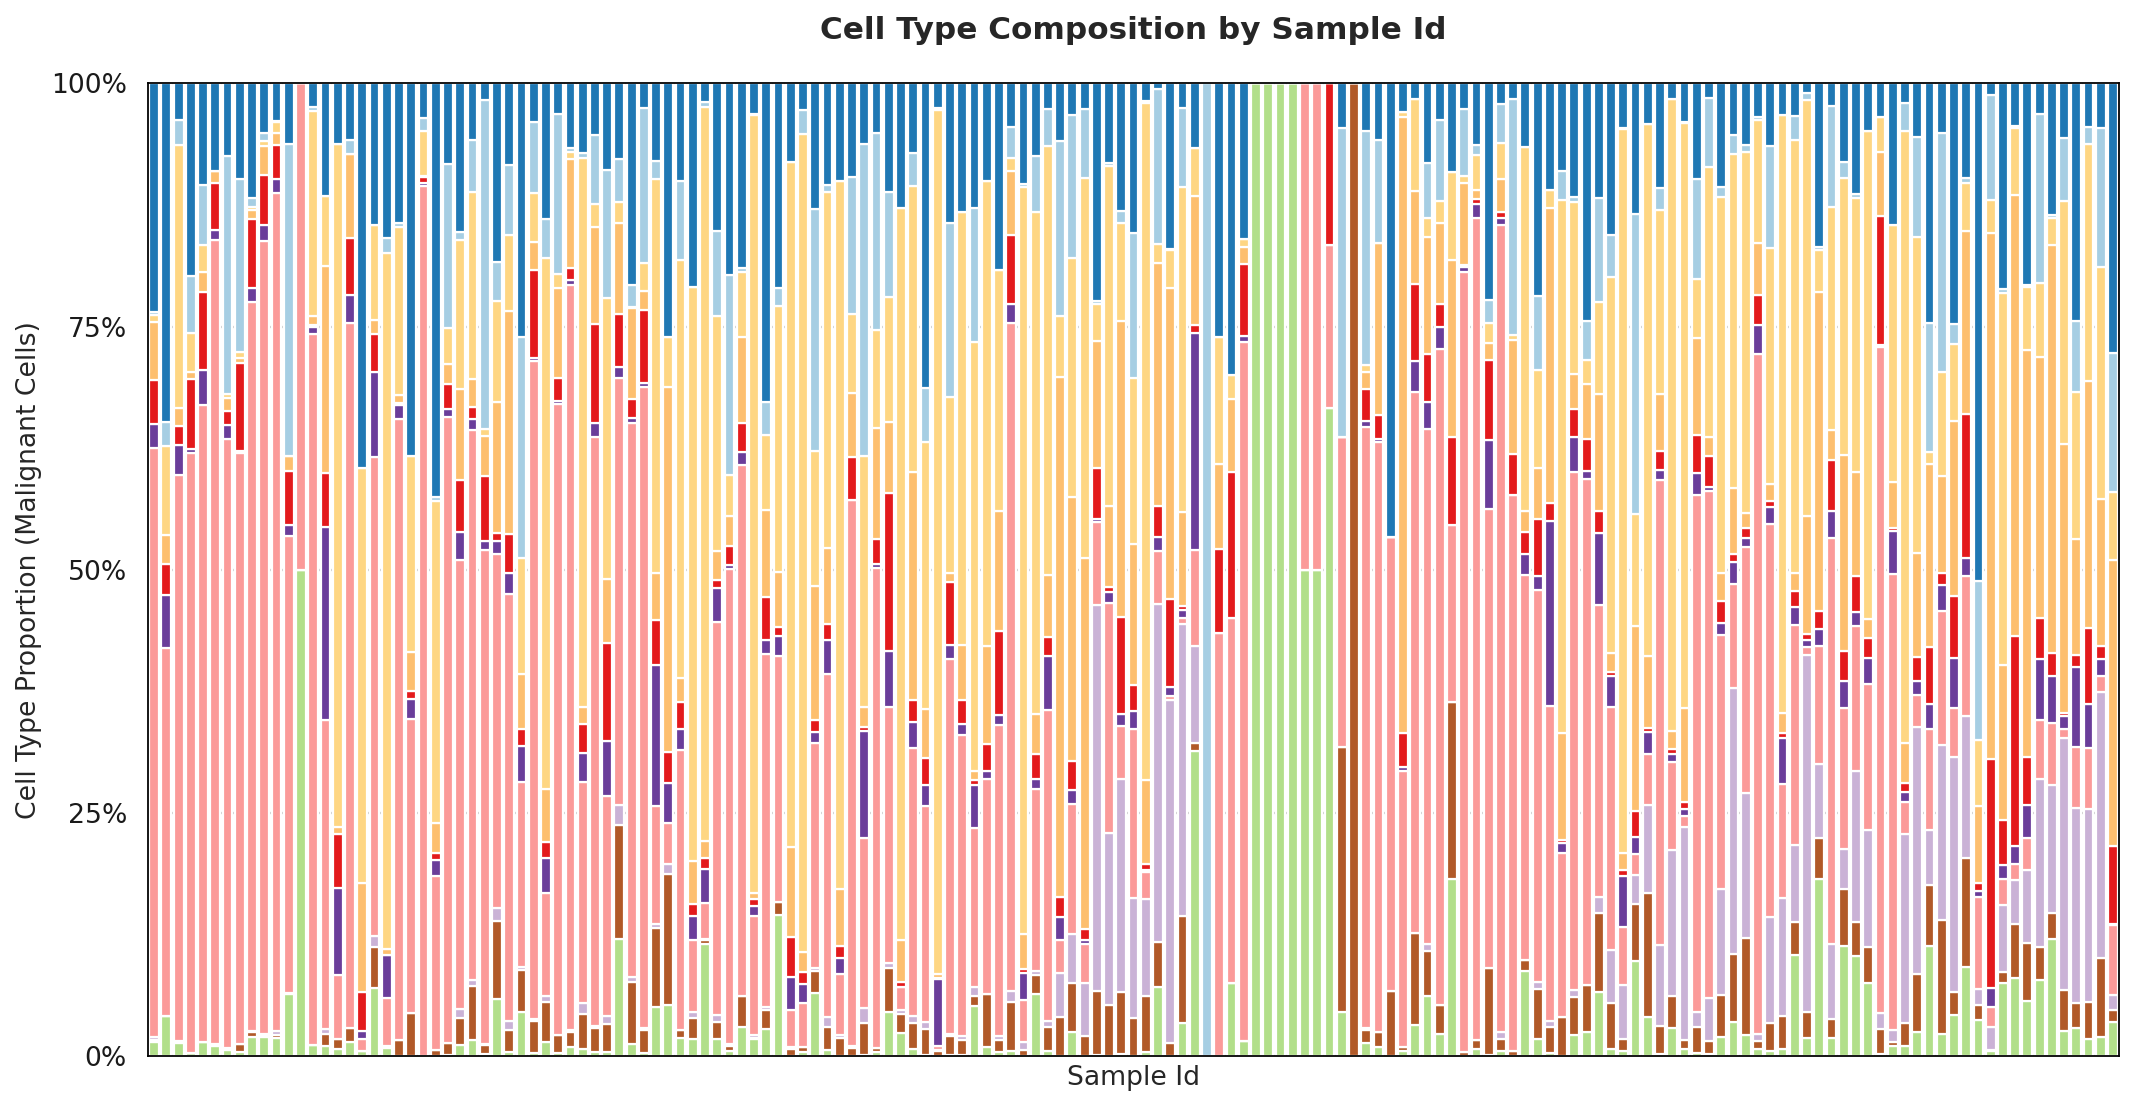

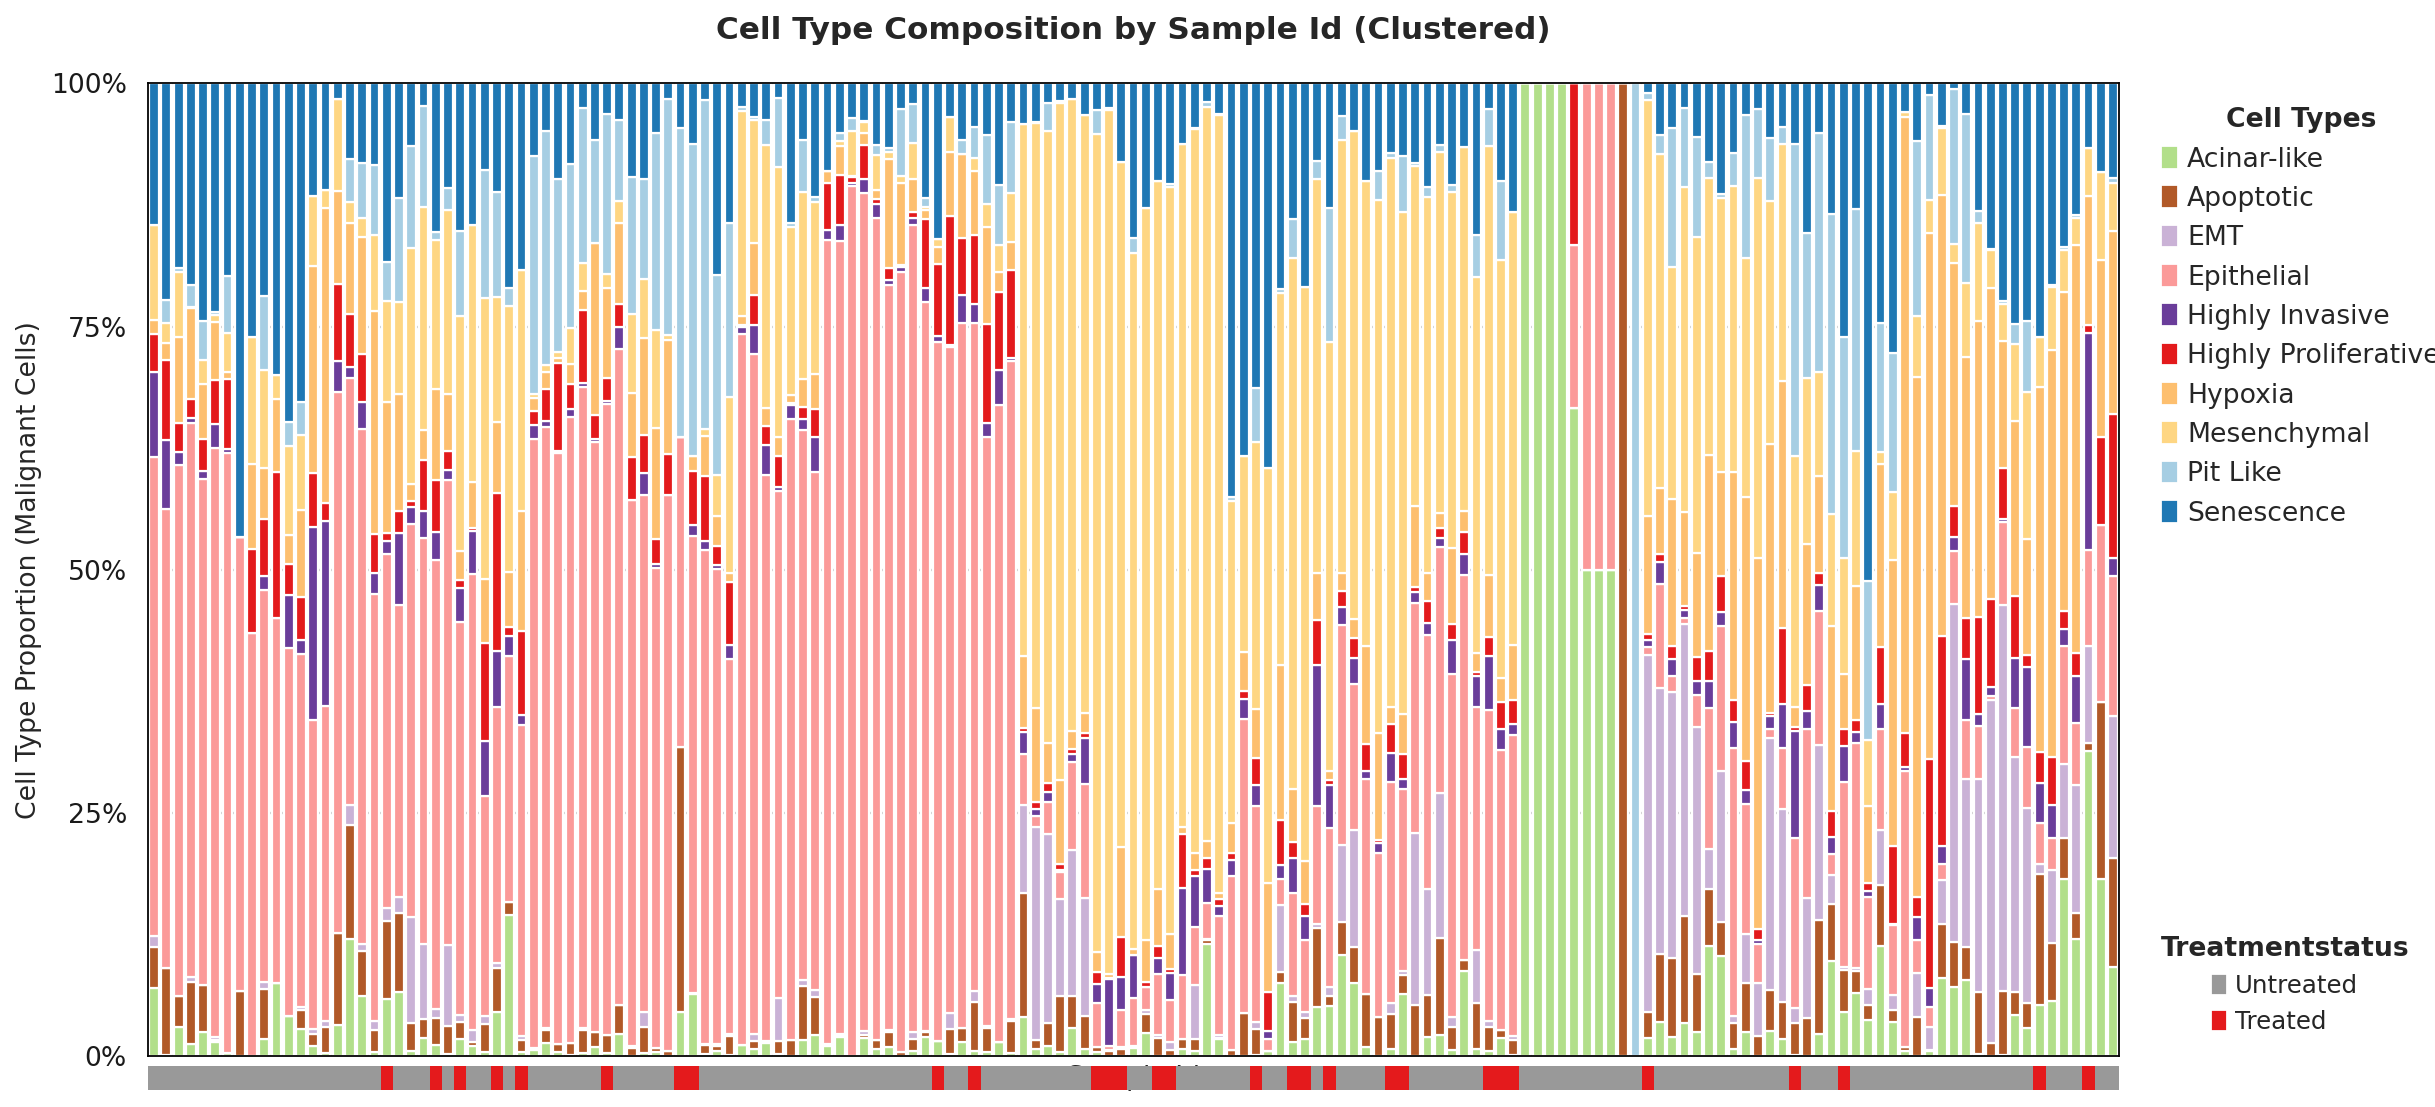

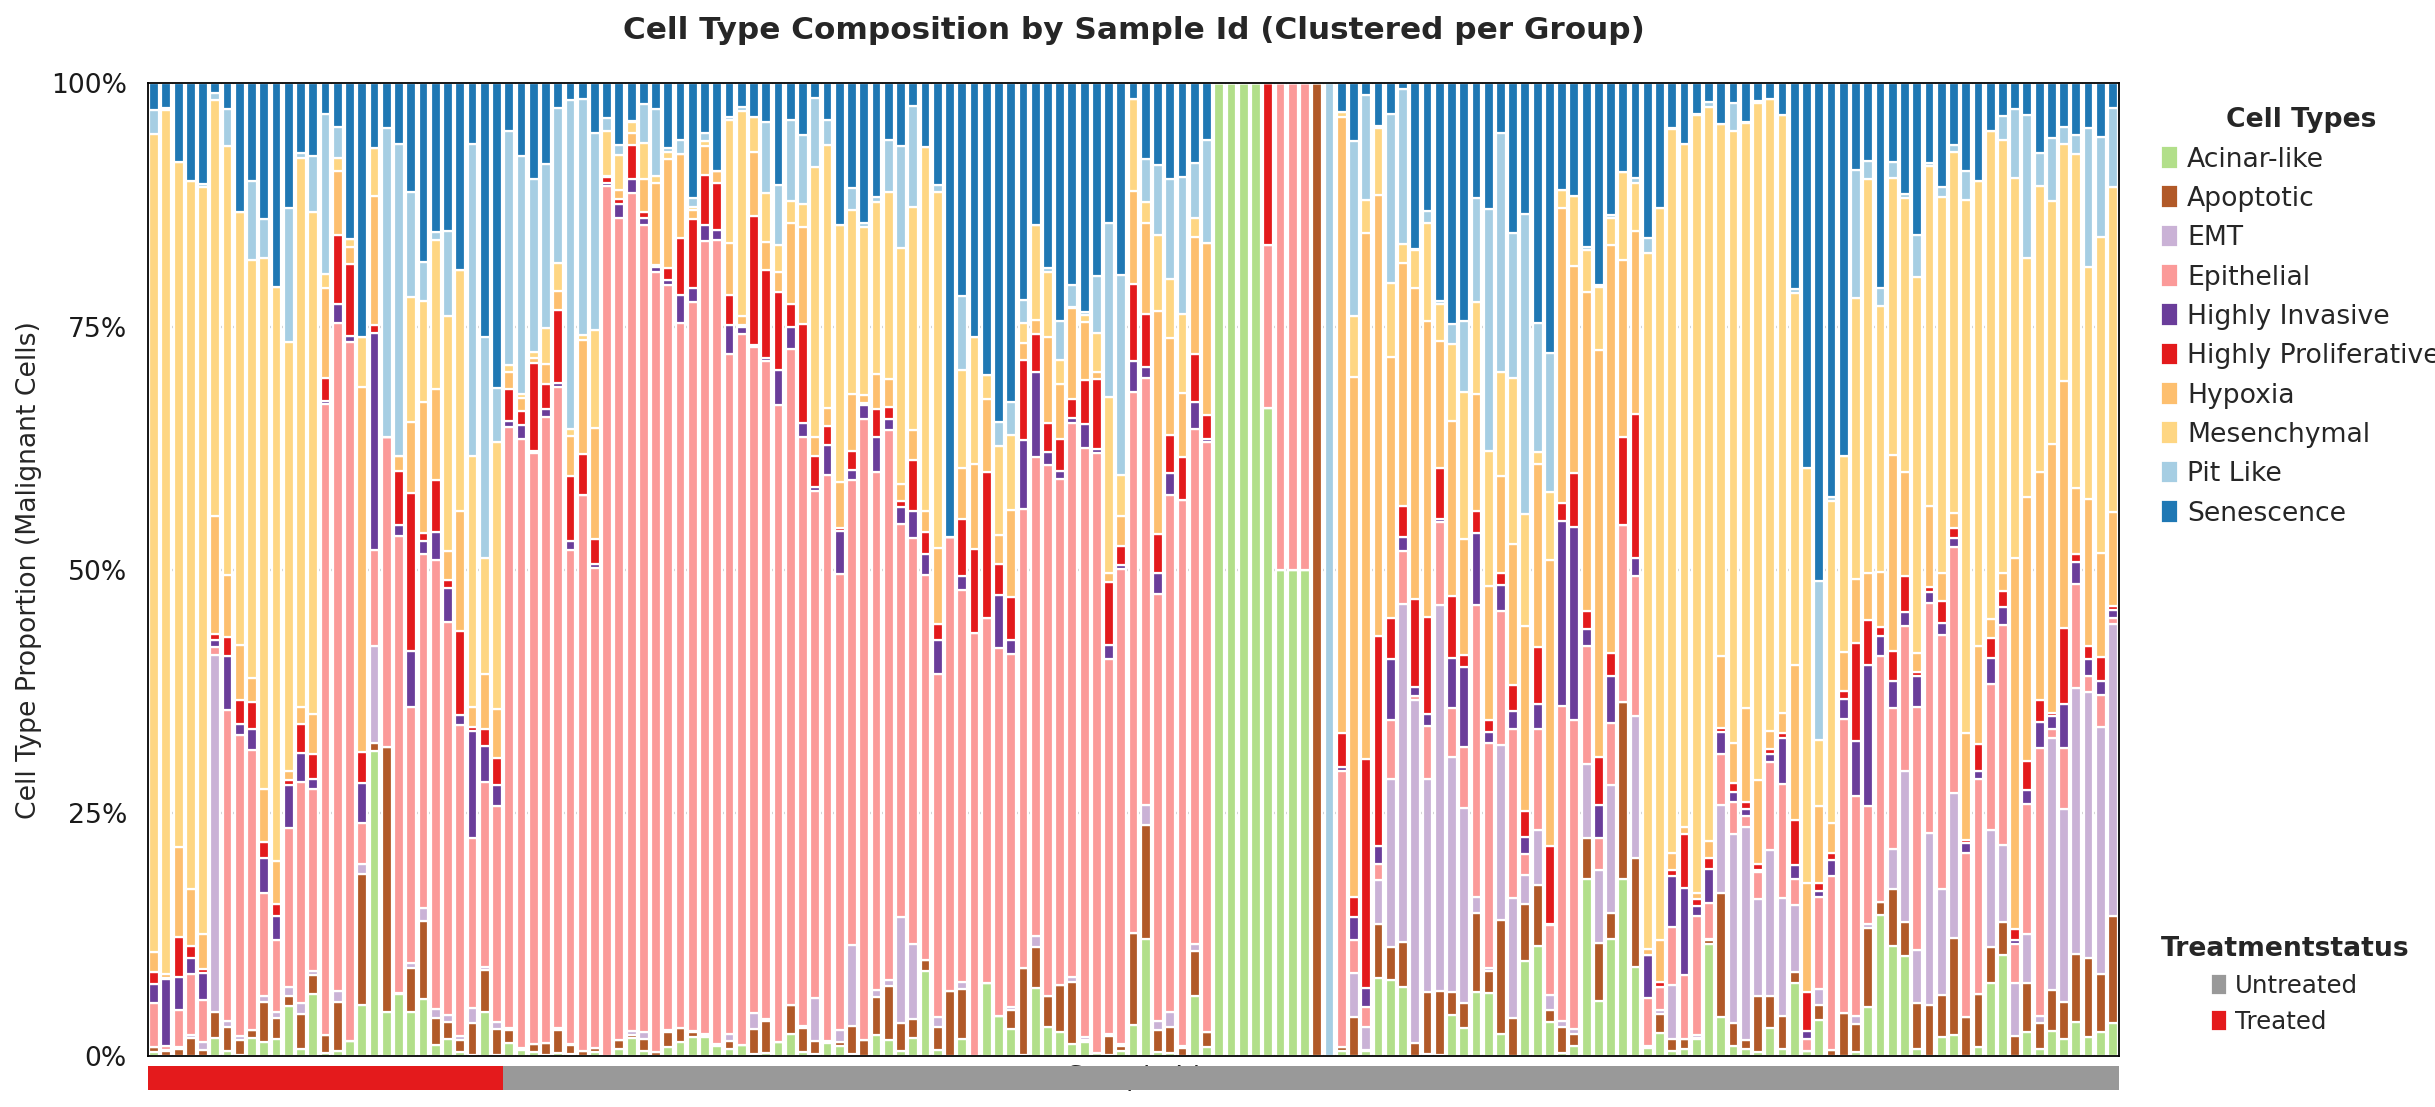

In [13]:
fig = figgen.create_all_stacked_barplots(
    adata, 
    level_column='Level_4',
    subset_level='Level_2',
    subset_value="Malignant Cell",
    order_by_column='TreatmentStatus',
    save_name_prefix='malignant_cells_composition_Treatment_Status'
)

In [ ]:
fig = figgen.create_all_stacked_barplots(
    adata, 
    level_column='Level_4',
    subset_level='Level_2',
    subset_value="Malignant Cell",
    order_by_column='TreatmentType',
    save_name_prefix='malignant_cells_composition_Treatment_Type',
)

ValueError: No palette found in self.config['palettes'] for order_by_column 'TreatmentType'

Subset to 284086 cells with Level_2 in ['Malignant Cell']
Figure saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/compositional_plot/malignant_cells_composition_heatmap.png


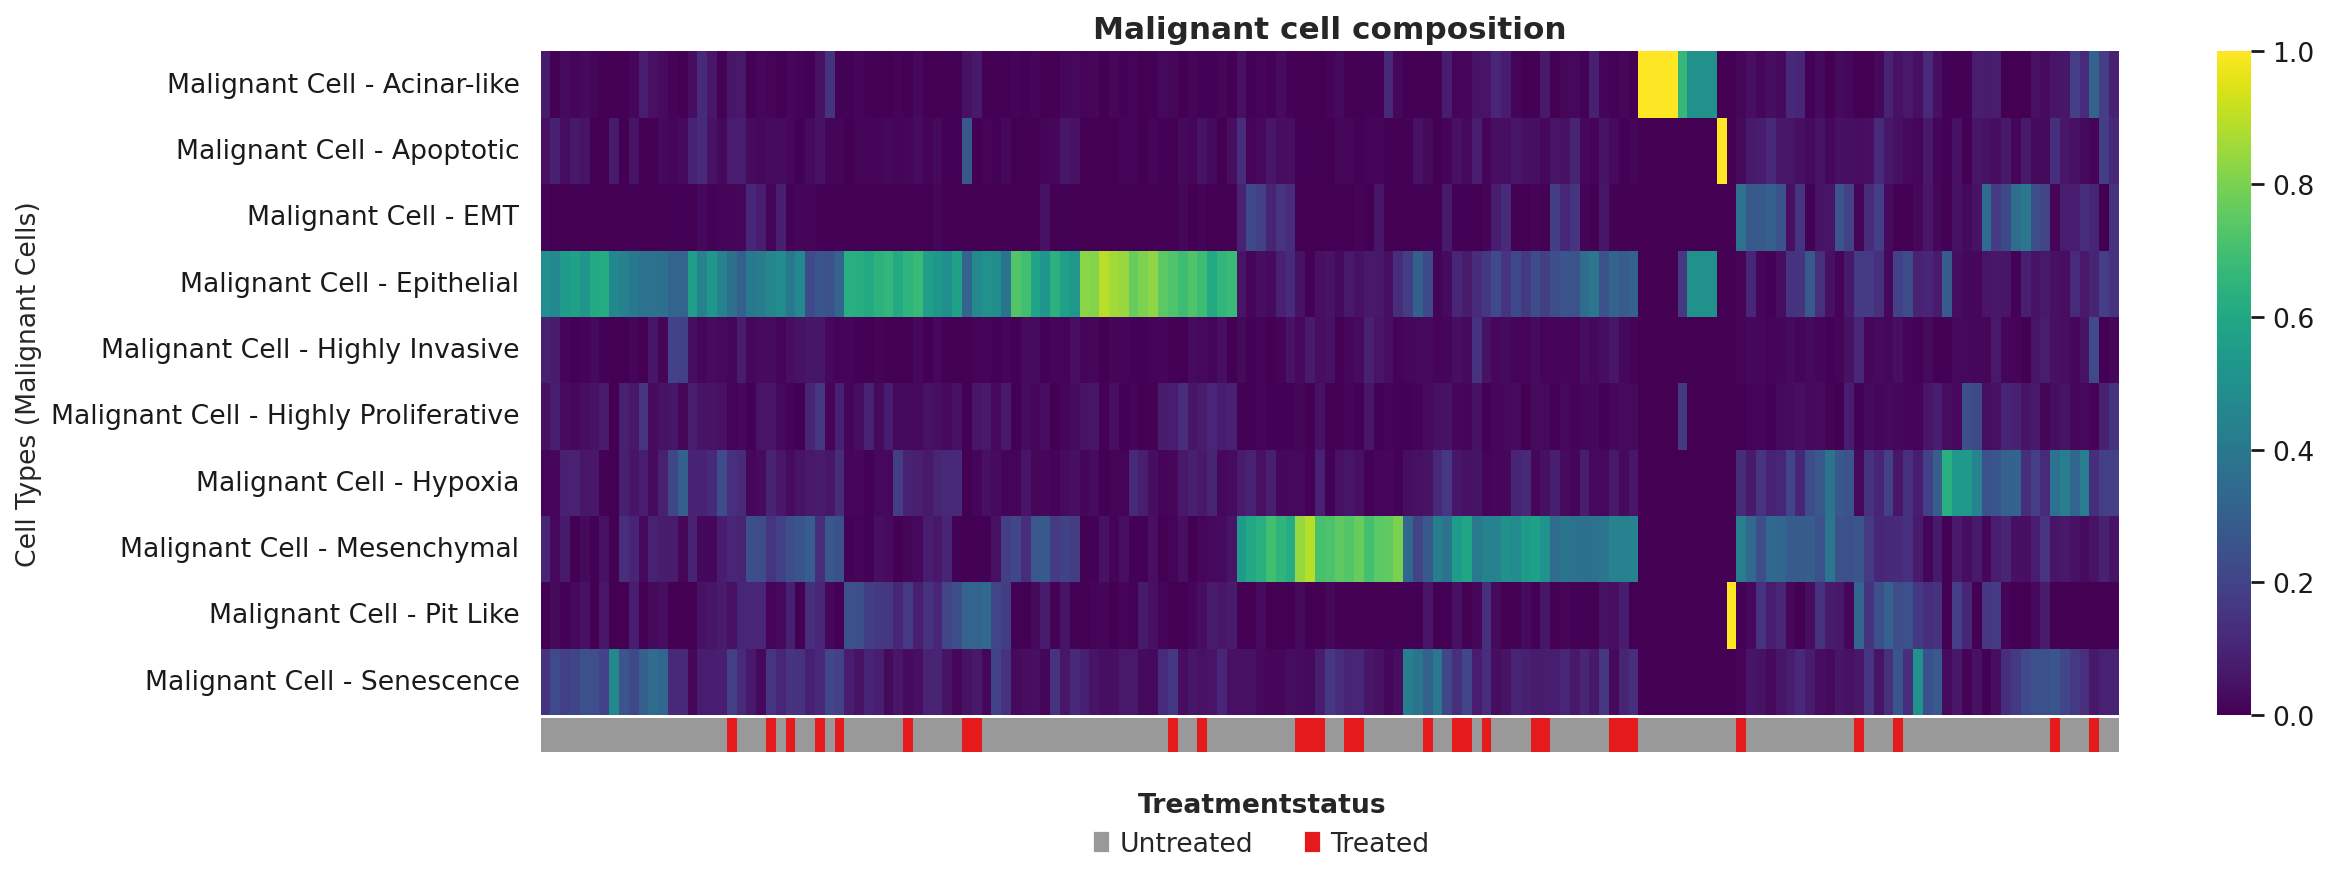

In [15]:
fig = figgen.composition_heatmap(
        adata, 
    level_column='Level_4',
    subset_level='Level_2',
    subset_value="Malignant Cell",
    order_by_column='TreatmentStatus',
    title='Malignant cell composition',
    save_name='malignant_cells_composition_heatmap',
    figsize=(16,5)
)

In [16]:
sc.settings.figdir = "/mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/scanpy_umaps/"

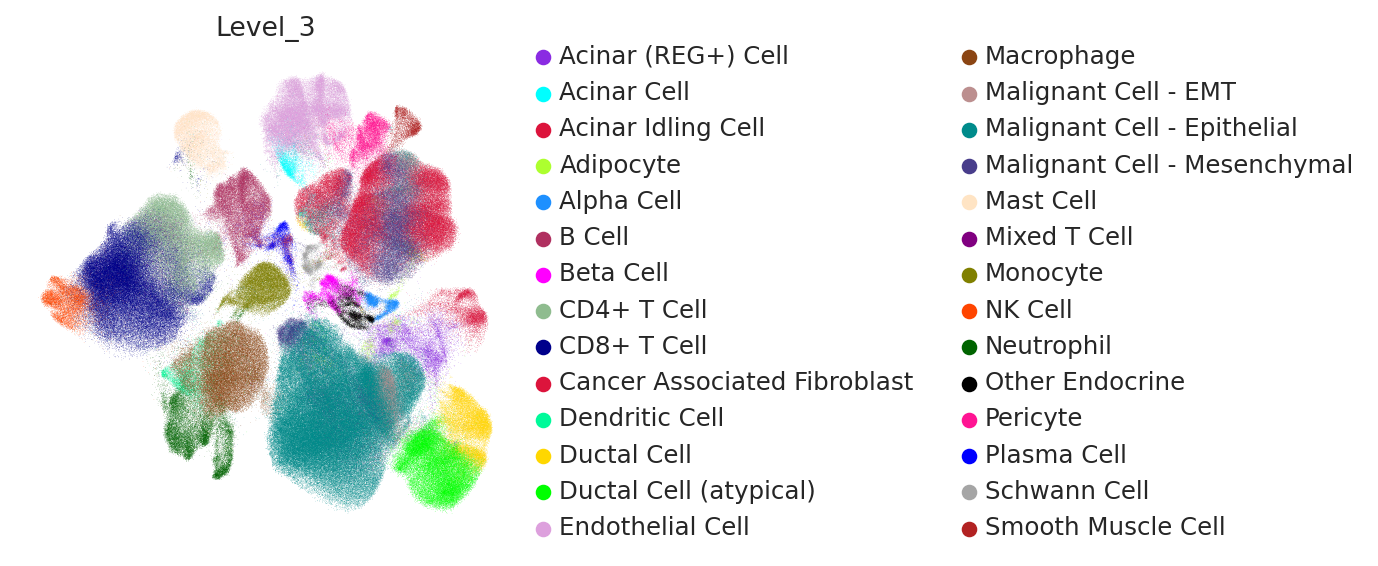

<Axes: title={'center': 'Level_3'}, xlabel='UMAP1', ylabel='UMAP2'>

In [17]:
sc.pl.umap(adata,color="Level_3",frameon=False,palette=figgen.config["palettes"]["Level_3"],save="_level3_coloured.png")
sc.pl.umap(adata,color="Level_3",frameon=False,legend_loc=None,show=False,palette=figgen.config["palettes"]["Level_3"],save="_level3_coloured_nolegend.png")

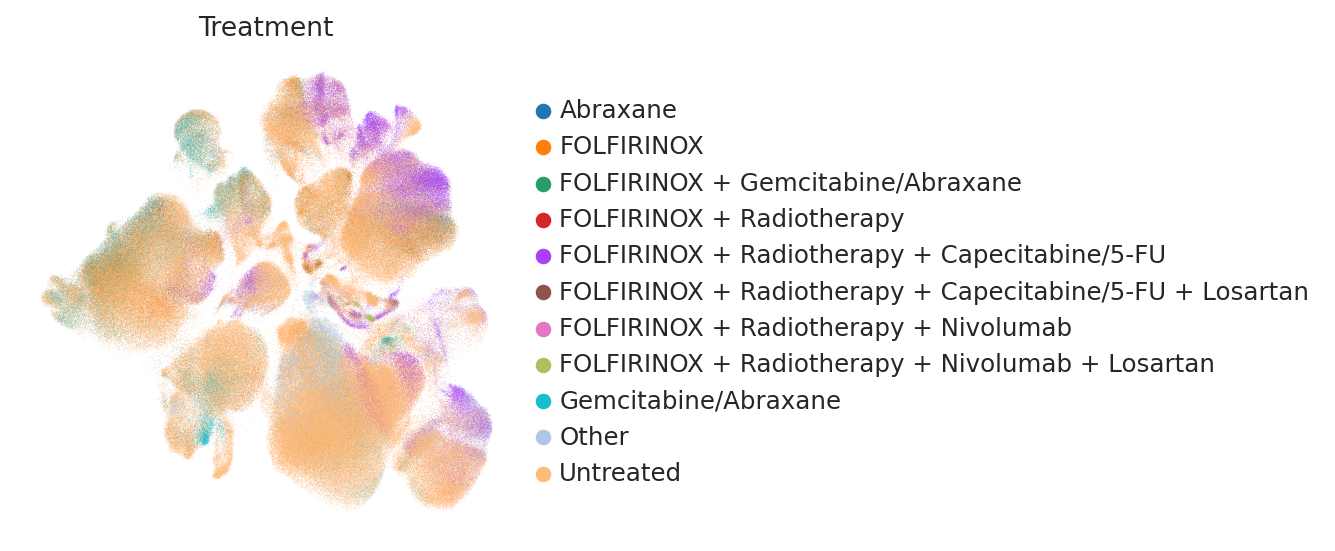

<Axes: title={'center': 'Treatment'}, xlabel='UMAP1', ylabel='UMAP2'>

In [18]:
sc.pl.umap(adata,color="Treatment",frameon=False,save="_treatment_coloured.png")
sc.pl.umap(adata,color="Treatment",frameon=False,legend_loc=None,show=False,save="_Treatment_coloured_nolegend.png")

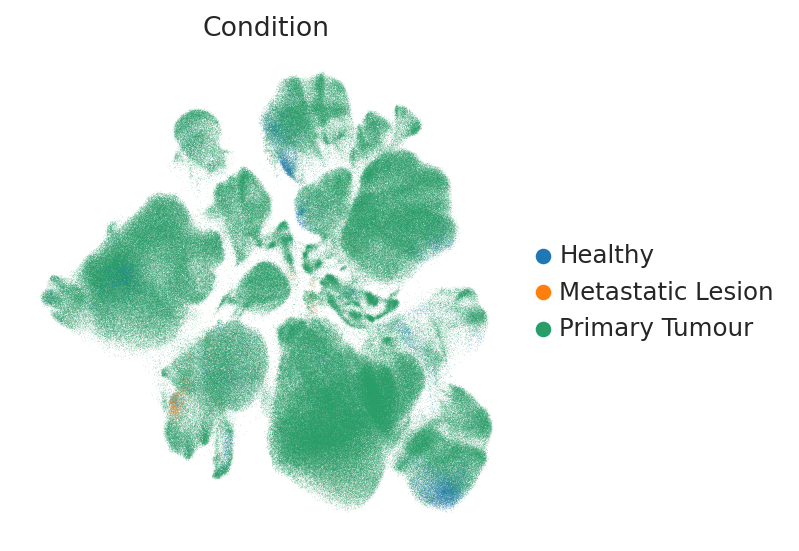

<Axes: title={'center': 'Condition'}, xlabel='UMAP1', ylabel='UMAP2'>

In [19]:
sc.pl.umap(adata,color="Condition",frameon=False,save="_Condition_coloured.png")
sc.pl.umap(adata,color="Condition",frameon=False,legend_loc=None,show=False,save="_Condition_coloured_nolegend.png")

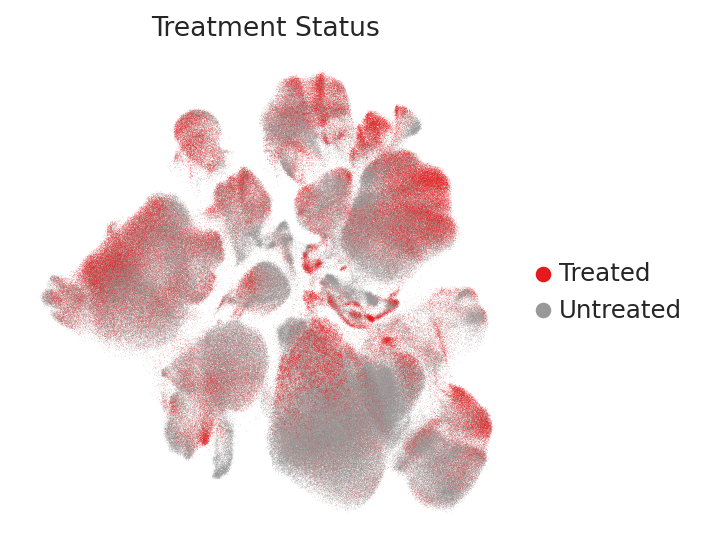

<Axes: title={'center': 'Treatment Status'}, xlabel='UMAP1', ylabel='UMAP2'>

In [20]:
sc.pl.umap(adata,color="TreatmentStatus",palette=figgen.config["palettes"]["TreatmentStatus"],title="Treatment Status",frameon=False,save="_TreatmentStatus_coloured.png")
sc.pl.umap(adata,color="TreatmentStatus",palette=figgen.config["palettes"]["TreatmentStatus"],title="Treatment Status",frameon=False,legend_loc=None,show=False,save="_Condition_coloured_nolegend.png")

In [21]:
###add sankey, add matrixplot markers


In [22]:
adata

AnnData object with n_obs × n_vars = 804862 × 44292
    obs: 'Sample_ID', 'Condition', 'Treatment', 'TreatmentType', 'TreatmentStatus', 'Tissue', 'Sex', 'Dataset', 'Technology', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Age', 'Diabetes', 'Is_Core', 'EMT category', 'Data_Source', 'Level_4_filtered', 'Level_4_filtered_sizes', 'TreatmentStatus_filtered', 'TreatmentStatus_filtered_sizes'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name_adata_sc', 'highly_variable_adata_sc', 'means_adata_sc', 'dispersions_adata_sc', 'dispersions_norm_adata_sc', 'highly_variable_nbatches_adata_sc', 'highly_variable_intersection_adata_sc', 'n_cells_by_counts_adata_sc', 'mean_counts_adata_sc', 'log1p_mean_counts_adata_sc', 'pct_dropout_by_counts_adata_sc', 'total_counts_adata_sc', 'log1p_total_counts_adata_sc', 'mito_adata_sc', 'n_cells_by_counts_adata_sn', 'mean_counts_adata_sn', 'log1p_mean_counts_adata_sn', 'pct_dropout_by_counts_adata_sn', 'total_counts_adata_sn', 'log1p_total_

Computing marker genes for 'Level_4' using wilcoxon method...
Generating dotplot...


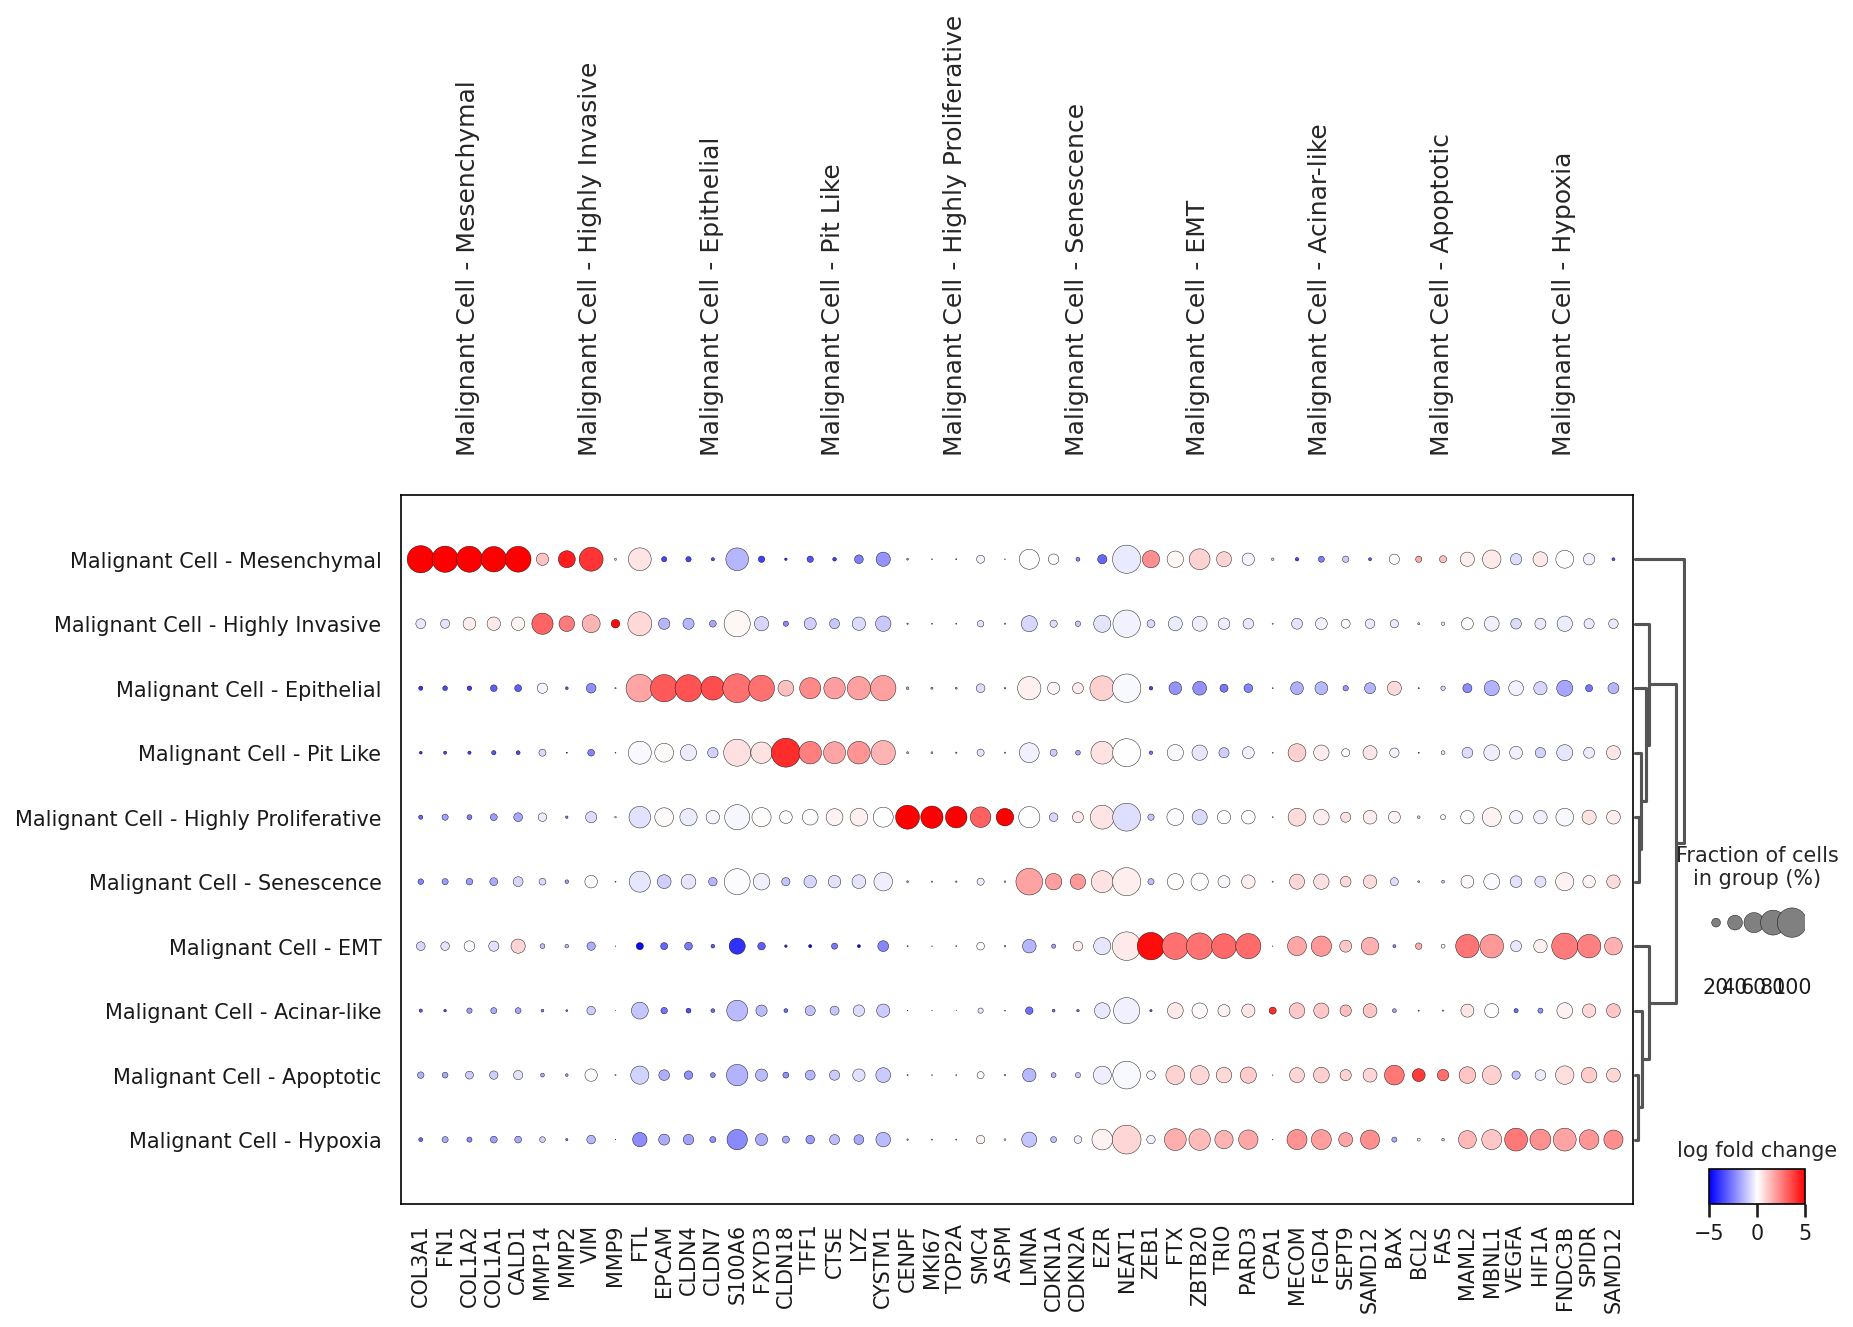

Dotplot saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/marker_analysis/malignant_markers_dotplot.png
Generating matrixplot...


<Figure size 320x320 with 0 Axes>

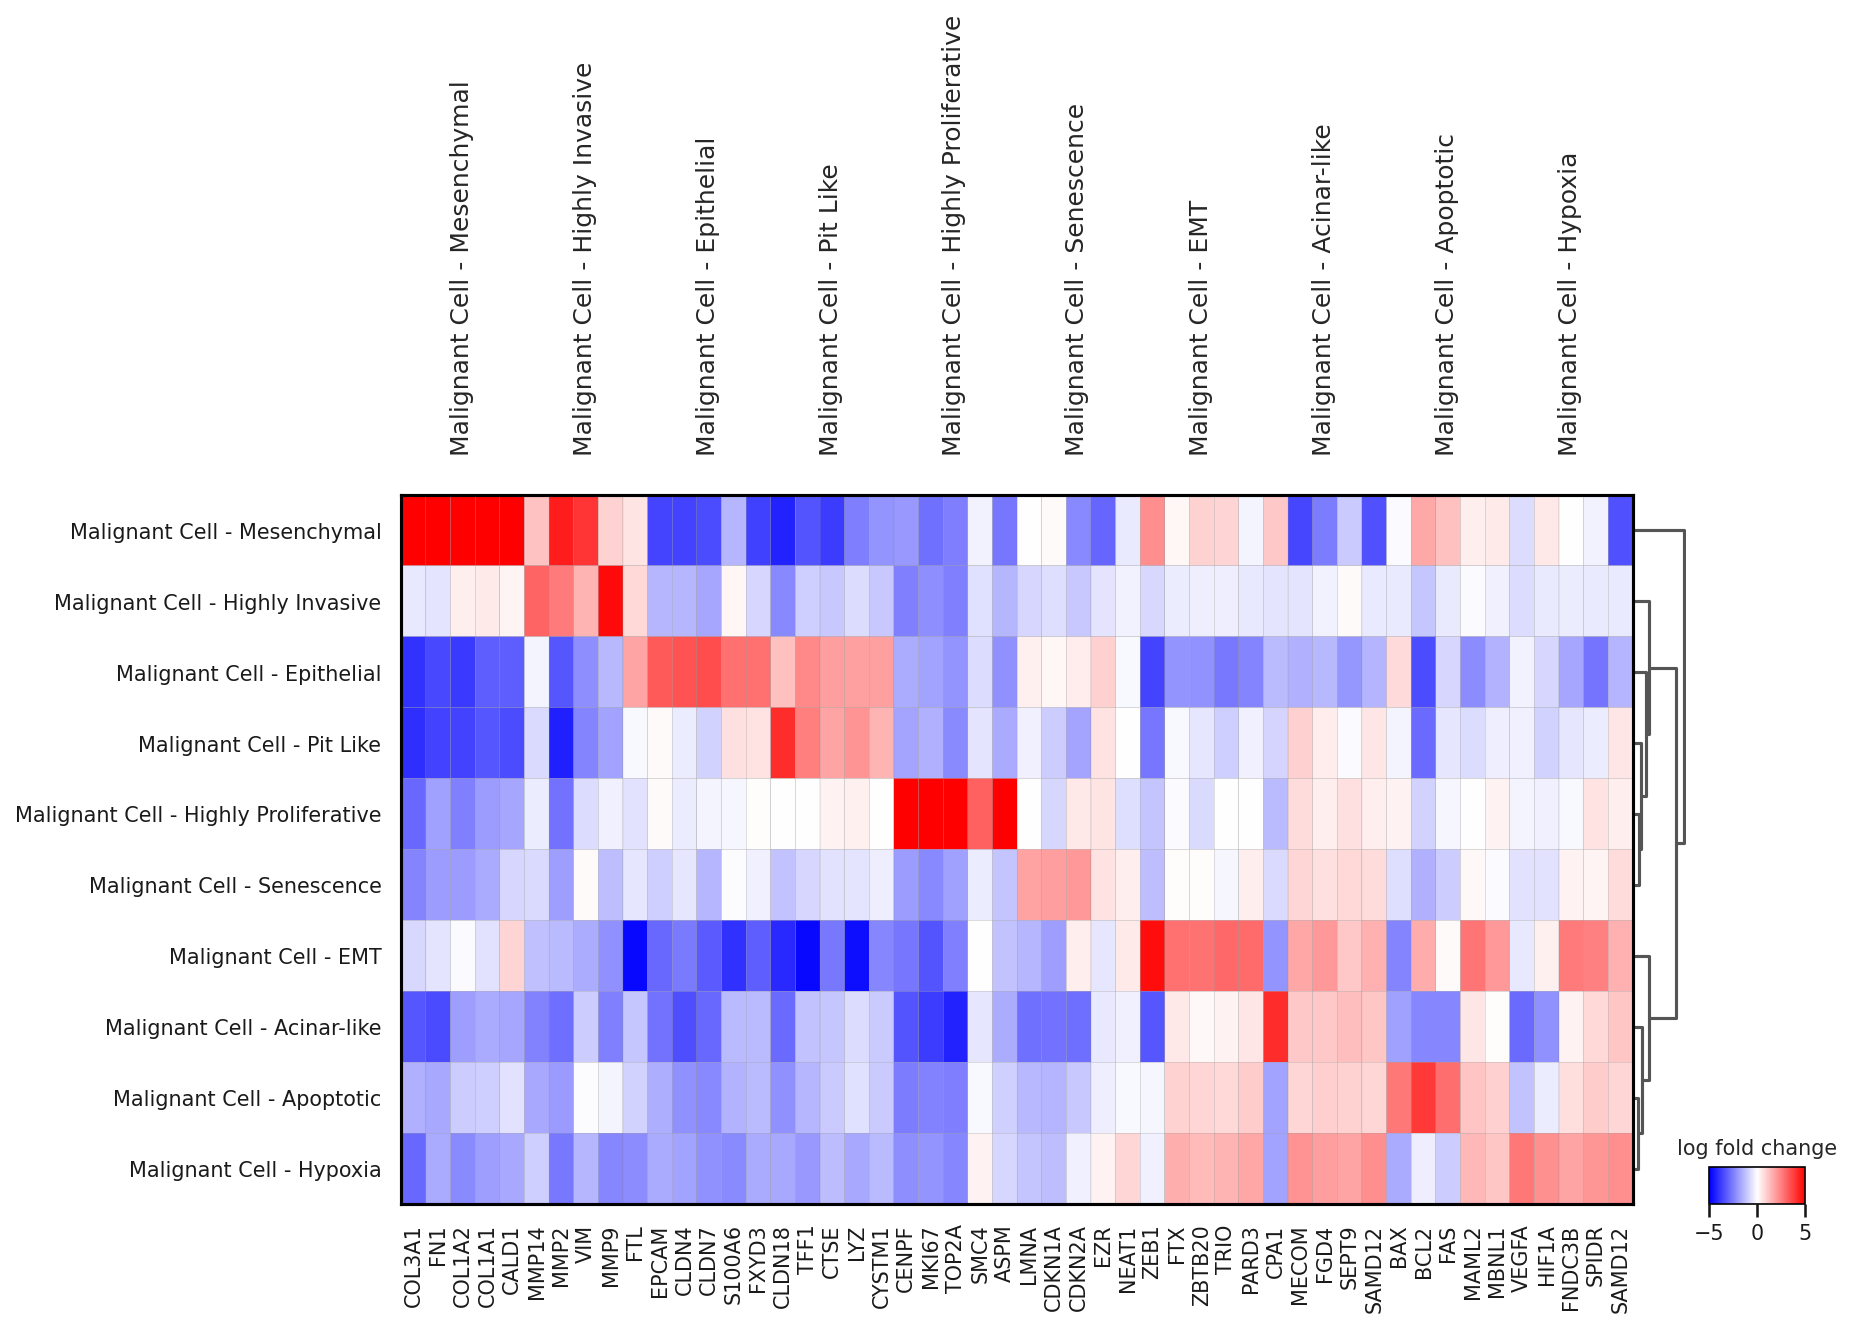

Matrixplot saved to: /mnt/kkf2/Cell/AG-Saur/KKF2/Daniele/pdac_atlas_figures/figure2/marker_analysis/malignant_markers_matrixplot.png


(<Figure size 900x600 with 7 Axes>, <Figure size 900x600 with 6 Axes>)

<Figure size 320x320 with 0 Axes>

In [23]:
figgen.matrix_markers(adata[adata.obs["Level_2"]=="Malignant Cell"],groupby_column="Level_4",save_name="malignant_markers")

In [ ]:
figgen.matrix_markers(adata[adata.obs["Level_2"]=="Malignant Cell"],groupby_column="Level_4",n_markers=3,save_name="malignant_markers_n3")

Computing marker genes for 'Level_4' using wilcoxon method...


In [ ]:
#add json markers plot matrix
import json

with open('../../supplementary_data/human/annotation_markers.json', 'r') as f:
   data = json.load(f)

malignant_markers = list(data["Malignant Cells"]["markers"].values())

malignant_markers_flat = [marker for sublist in data["Malignant Cells"]["markers"].values() for marker in sublist] 


In [ ]:
sc.pl.matrixplot(adata,var_names=)